### Import Library

In [92]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Matikan warning merah yang tidak perlu (biar notebook bersih)
warnings.filterwarnings('ignore')

# Set style plot biar ganteng
sns.set_style("whitegrid")

### Load Dataset

In [93]:
# load dataset
df = pd.read_csv("dataset/dataset_laporan_iklim_harian.csv")
df.columns

Index(['TANGGAL', 'TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'FF_X', 'FF_AVG'], dtype='object')

### EDA Dasar

In [94]:
# cek jumlah data
df.shape

(730, 8)

In [95]:
# info umum dataset
print("\n== Info Dataset ==")
df.info()

# menampilkan 10 baris pertama dataset
print("\n== 20 Baris Pertama Dataset ==")
df.head(20)


== Info Dataset ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TANGGAL  730 non-null    object 
 1   TN       725 non-null    float64
 2   TX       725 non-null    float64
 3   TAVG     729 non-null    float64
 4   RH_AVG   729 non-null    float64
 5   RR       695 non-null    float64
 6   FF_X     730 non-null    int64  
 7   FF_AVG   730 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 45.8+ KB

== 20 Baris Pertama Dataset ==


,TANGGAL,TN,TX,TAVG,RH_AVG,RR,FF_X,FF_AVG
0,02-02-2024,24.2,29.0,26.3,85.0,0.0,4,2
1,03-02-2024,23.6,31.7,28.0,79.0,3.9,5,2
2,04-02-2024,24.1,30.6,27.8,81.0,1.5,4,2
3,05-02-2024,23.2,31.5,28.9,74.0,16.3,5,3
4,06-02-2024,24.2,30.0,27.2,83.0,0.0,5,1
5,07-02-2024,24.0,31.0,26.5,80.0,8888.0,4,2
6,08-02-2024,23.2,31.4,28.3,74.0,15.6,3,1
7,09-02-2024,24.0,31.7,29.2,73.0,0.0,5,2
8,10-02-2024,24.2,30.0,27.4,82.0,0.0,3,2
9,11-02-2024,24.0,31.8,29.2,73.0,1.0,5,2


In [96]:
# statistik deskriptif
print("\n== Statistik Deskriptif ==")
df.describe()


== Statistik Deskriptif ==


,TN,TX,TAVG,RH_AVG,RR,FF_X,FF_AVG
count,725.000000,725.000000,729.000000,729.000000,695.000000,730.000000,730.000000
mean,23.247172,31.325103,26.865295,82.137174,442.934820,4.471233,1.897260
std,1.172243,1.341612,1.334780,6.283185,1916.781512,1.451500,0.707877
min,18.400000,24.600000,23.200000,63.000000,0.000000,2.000000,0.000000
25%,22.800000,30.600000,26.000000,78.000000,0.000000,4.000000,1.000000
50%,23.400000,31.400000,26.700000,83.000000,0.400000,4.000000,2.000000
75%,24.000000,32.200000,27.700000,87.000000,11.900000,5.000000,2.000000
max,25.600000,36.800000,30.500000,97.000000,8888.000000,13.000000,6.000000


In [97]:
# cek missing values
print("\n== Cek Missing Values ==")
df.isnull().sum()


== Cek Missing Values ==


TANGGAL     0
TN          5
TX          5
TAVG        1
RH_AVG      1
RR         35
FF_X        0
FF_AVG      0
dtype: int64

In [98]:
# cek total data 0
print("\n== Cek Total Data Nol ==")
(df == 0).sum()


== Cek Total Data Nol ==


TANGGAL      0
TN           0
TX           0
TAVG         0
RH_AVG       0
RR         337
FF_X         0
FF_AVG       4
dtype: int64

In [99]:
# cek duplikasi data
df.duplicated().sum()

np.int64(0)

### Parsing Tanggal & Time Series Index

In [100]:
# convert tanggal ke format datetime dengan dayfirst=True
# data tanggal menggunakan format dd-mm-yyyy, sehingga perlu menambahkan dayfirst=True

df["TANGGAL"] = pd.to_datetime(df["TANGGAL"], dayfirst=True)

# set sebagai index (best practice time-series)
df = df.set_index("TANGGAL").sort_index()

### Normalisasi Nilai Tidak Valid BMKG (8888 & 9999)

In [101]:
# daftar kolom numerik iklim
climate_cols = ["TN", "TX", "TAVG", "RH_AVG", "RR", "FF_X", "FF_AVG"]

# replace nilai invalid BMKG
df[climate_cols] = df[climate_cols].replace([8888, 9999], np.nan)

### Penanganan Nilai 0 (BERBASIS DOMAIN)

In [102]:
# 0 dianggap error untuk fitur-fitur ini
zero_as_nan_cols = ["TN", "TX", "TAVG", "RH_AVG", "FF_X", "FF_AVG"]

for col in zero_as_nan_cols:
    df.loc[df[col] == 0, col] = np.nan

### Validasi Missing Value

In [103]:
# validasi missing values 
print("\n== Cek Missing Values ==")
df.isnull().sum()


== Cek Missing Values ==


TN         5
TX         5
TAVG       1
RH_AVG     1
RR        69
FF_X       0
FF_AVG     4
dtype: int64

### Interpolasi Time Series

In [104]:
# interpolasi missing values dengan metode time
df_clean = df.interpolate(method="time")
df_clean.shape

(730, 7)

### Penanganan Akhir Curah Hujan (RR)

In [105]:
# ubah nilai RR yang masih NaN menjadi 0
df_clean["RR"] = df_clean["RR"].fillna(0)

### Final Validation

In [106]:
# validasi missing values setelah cleaning
print("\n== Cek Missing Values Setelah Cleaning ==")
df_clean.isna().sum()


== Cek Missing Values Setelah Cleaning ==


TN        0
TX        0
TAVG      0
RH_AVG    0
RR        0
FF_X      0
FF_AVG    0
dtype: int64

In [107]:
# display data setelah cleaning
df_clean.head(10)

,TN,TX,TAVG,RH_AVG,RR,FF_X,FF_AVG
TANGGAL,,,,,,,
2024-02-02,24.2,29.0,26.3,85.0,0.0,4.0,2.0
2024-02-03,23.6,31.7,28.0,79.0,3.9,5.0,2.0
2024-02-04,24.1,30.6,27.8,81.0,1.5,4.0,2.0
2024-02-05,23.2,31.5,28.9,74.0,16.3,5.0,3.0
2024-02-06,24.2,30.0,27.2,83.0,0.0,5.0,1.0
2024-02-07,24.0,31.0,26.5,80.0,7.8,4.0,2.0
2024-02-08,23.2,31.4,28.3,74.0,15.6,3.0,1.0
2024-02-09,24.0,31.7,29.2,73.0,0.0,5.0,2.0
2024-02-10,24.2,30.0,27.4,82.0,0.0,3.0,2.0


### Tren Temperatur Rata-rata Harian (TAVG)

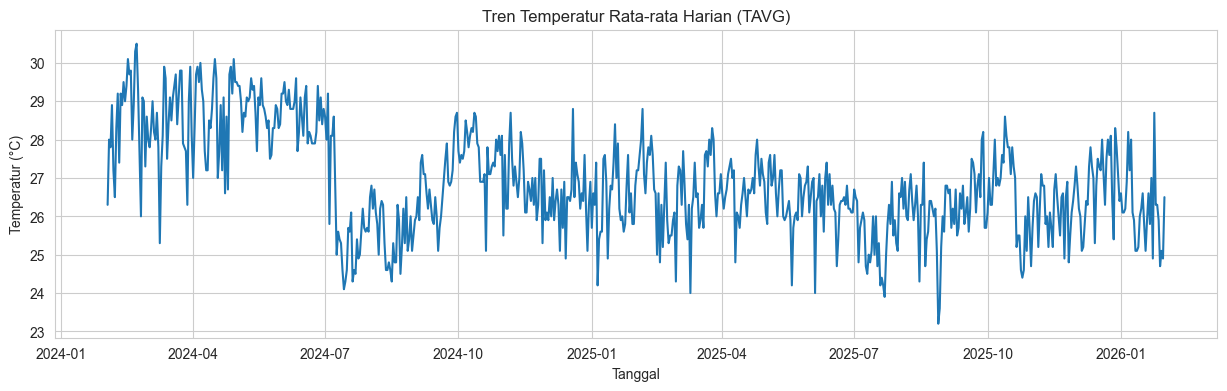

In [108]:
# Tren Temperatur Rata-rata Harian (TAVG)
plt.figure(figsize=(15, 4))
plt.plot(df_clean.index, df_clean["TAVG"])
plt.title("Tren Temperatur Rata-rata Harian (TAVG)")
plt.xlabel("Tanggal")
plt.ylabel("Temperatur (°C)")
plt.show()

### Distribusi Temperatur Rata-rata (TAVG)

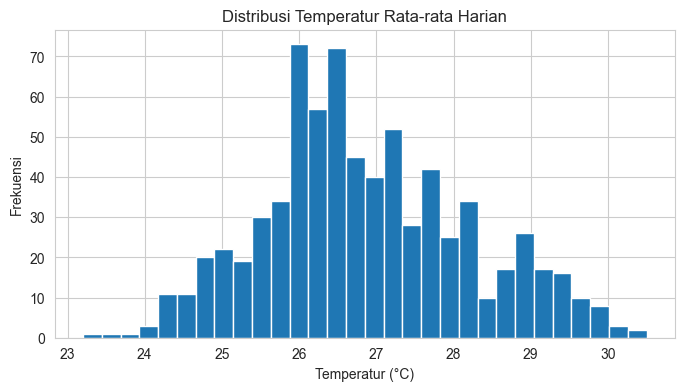

In [109]:
# Histogram Temperatur Rata-rata Harian (TAVG)
plt.figure(figsize=(8, 4))
plt.hist(df_clean["TAVG"], bins=30)
plt.title("Distribusi Temperatur Rata-rata Harian")
plt.xlabel("Temperatur (°C)")
plt.ylabel("Frekuensi")
plt.show()


### Tren TN, TX, dan TAVG (Perbandingan)

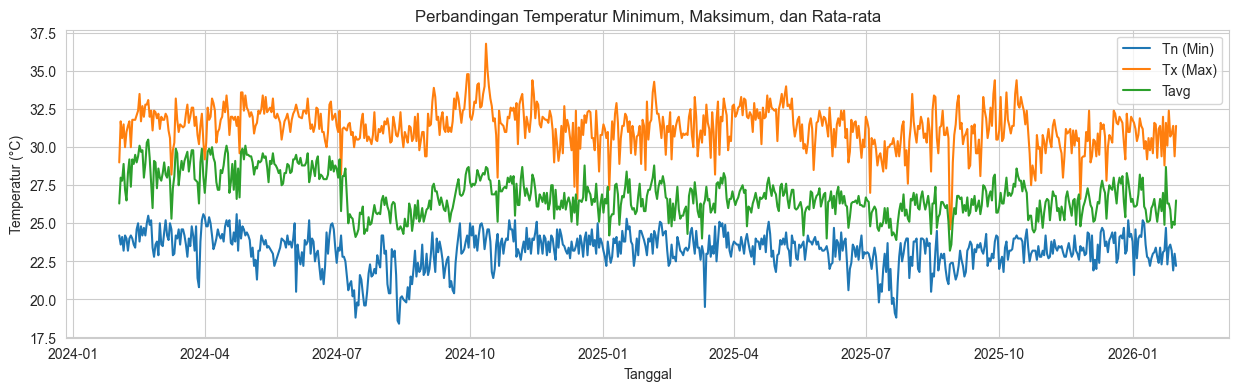

In [110]:
# Perbandingan Tren Temperatur Minimum, Maksimum, dan Rata-rata
plt.figure(figsize=(15, 4))
plt.plot(df_clean.index, df_clean["TN"], label="Tn (Min)")
plt.plot(df_clean.index, df_clean["TX"], label="Tx (Max)")
plt.plot(df_clean.index, df_clean["TAVG"], label="Tavg")
plt.legend()
plt.title("Perbandingan Temperatur Minimum, Maksimum, dan Rata-rata")
plt.xlabel("Tanggal")
plt.ylabel("Temperatur (°C)")
plt.show()


### Pola Musiman (Bulanan)

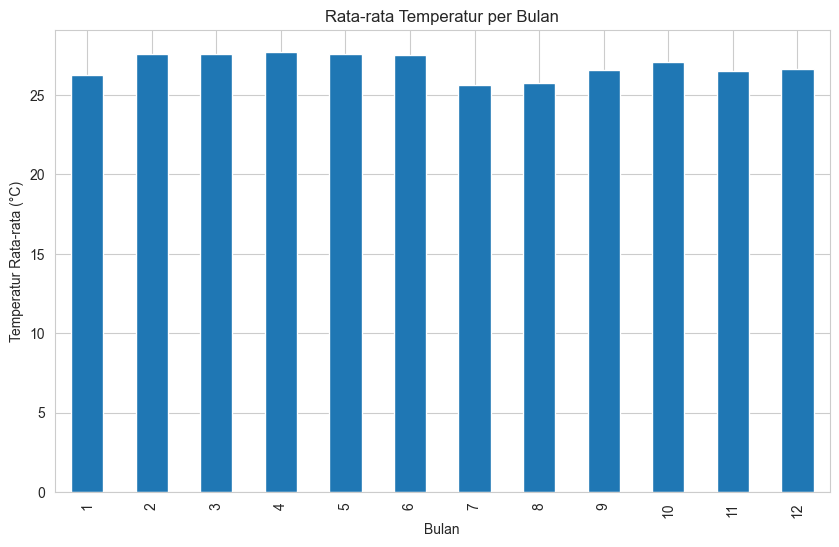

In [111]:
# Rata-rata Temperatur per Bulan
monthly_avg = df_clean.groupby(df_clean.index.month)["TAVG"].mean()

# Plot Rata-rata Temperatur per Bulan
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind="bar")
plt.title("Rata-rata Temperatur per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Temperatur Rata-rata (°C)")
plt.show()


### Curah Hujan vs Temperatur

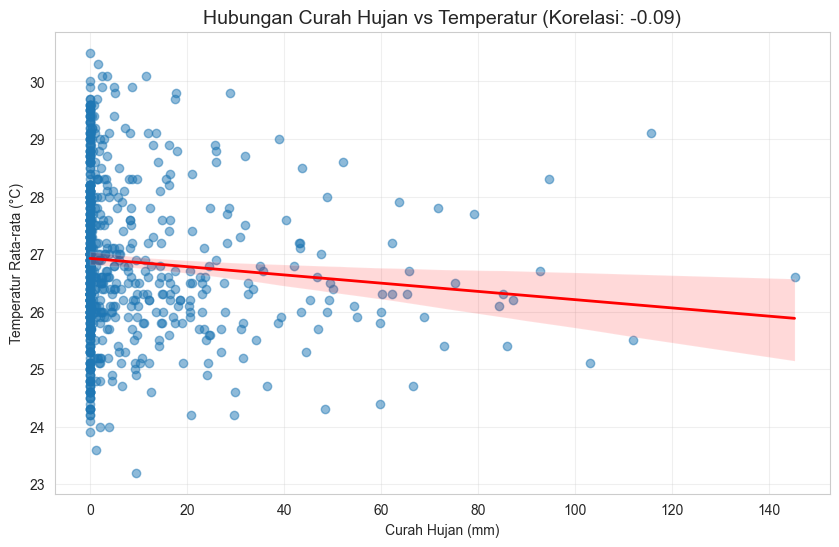

Correlation Matrix Spesifik:
            RR      TAVG
RR    1.000000 -0.094775
TAVG -0.094775  1.000000


In [112]:
# Scatter Plot: Curah Hujan vs Temperatur

plt.figure(figsize=(10, 6))

# Gunakan regplot dari Seaborn untuk otomatis menambah garis tren
sns.regplot(
    x="RR", 
    y="TAVG", 
    data=df_clean, 
    scatter_kws={'alpha':0.5, 'color':'#1f77b4'},
    line_kws={'color':'red', 'linewidth':2}
)

# Hitung korelasi spesifik untuk judul
corr_val = df_clean['RR'].corr(df_clean['TAVG'])

plt.xlabel("Curah Hujan (mm)")
plt.ylabel("Temperatur Rata-rata (°C)")
plt.title(f"Hubungan Curah Hujan vs Temperatur (Korelasi: {corr_val:.2f})", fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

# Print matriks korelasi spesifik untuk konfirmasi angka
print("Correlation Matrix Spesifik:")
print(df_clean[["RR", "TAVG"]].corr())

### Correlation Matriks Variabel Iklim

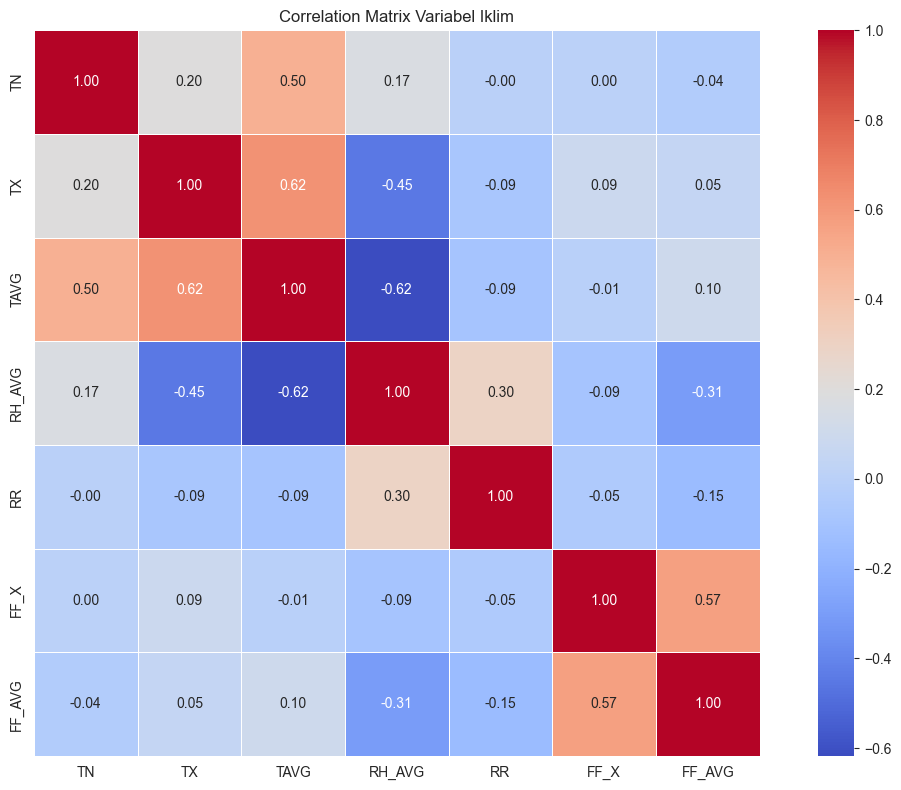

In [113]:
# Correlation Matrix Variabel Iklim
climate_features = [
    "TN", "TX", "TAVG", "RH_AVG", "RR", "FF_X", "FF_AVG"
]

plt.figure(figsize=(12, 8))
sns.heatmap(
    df_clean[climate_features].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5
)
plt.title("Correlation Matrix Variabel Iklim")
plt.tight_layout()
plt.show()

### Feature Engineering

In [114]:
# Feature Engineering
df_fe = df_clean.copy()

# Lag Features
df_fe["TAVG_lag1"] = df_fe["TAVG"].shift(1)
df_fe["TAVG_lag2"] = df_fe["TAVG"].shift(2)
df_fe["TAVG_roll7"] = df_fe["TAVG"].rolling(7).mean()

# Fitur Waktu
df_fe["month"] = df_fe.index.month

# Hapus baris dengan nilai NaN yang muncul akibat pembuatan fitur lag dan rolling
df_fe = df_fe.dropna()

### Train-Test Split

In [115]:
# Split Data Train & Test (80% Train, 20% Test)
train_size = int(len(df_fe) * 0.8)

train = df_fe.iloc[:train_size]
test = df_fe.iloc[train_size:]

x_train = train.drop(columns=["TAVG"])
y_train = train["TAVG"]

x_test = test.drop(columns=["TAVG"])
y_test = test["TAVG"]


### Naive Forecasting

In [116]:
# Naive Forecasting: Menggunakan nilai TAVG hari sebelumnya sebagai prediksi
y_pred_naive = test["TAVG_lag1"]

mae_naive = mean_absolute_error(y_test, y_pred_naive)
rmse_naive = np.sqrt(mean_squared_error(y_test, y_pred_naive))

print(f"MAE Naive Forecasting: {mae_naive:.4f}")
print(f"RMSE Naive Forecasting: {rmse_naive:.4f}")


MAE Naive Forecasting: 0.7331
RMSE Naive Forecasting: 0.9480


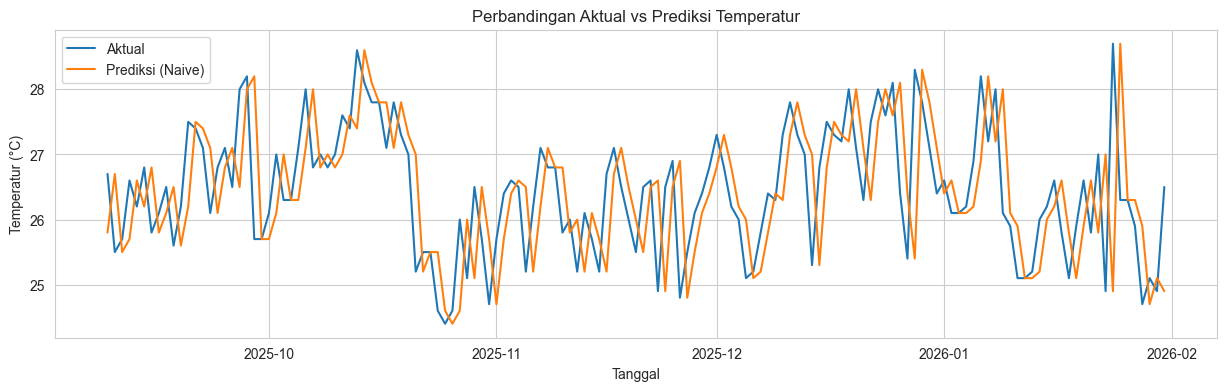

In [117]:
# Visualisasi Hasil Prediksi Naive vs Aktual
plt.figure(figsize=(15, 4))
plt.plot(y_test.index, y_test, label="Aktual")
plt.plot(y_test.index, y_pred_naive, label="Prediksi (Naive)")
plt.legend()
plt.title("Perbandingan Aktual vs Prediksi Temperatur")
plt.xlabel("Tanggal")
plt.ylabel("Temperatur (°C)")
plt.show()


### PREDIKSI MASA DEPAN (SEASONAL LINEAR REGRESSION)

### Feature Engineering

In [118]:
# Feature Engineering: Menambahkan Fitur Tren & Musiman
df_forecast = df_clean.copy()

# Fitur Tren Global (Date Ordinal)
# Mengubah tanggal menjadi angka urut (1, 2, 3...) agar bisa dibaca regresi
df_forecast['Date_Ordinal'] = df_forecast.index.map(pd.Timestamp.toordinal)

# Fitur Musiman (Cyclical Features)
# Menggunakan Sinus & Cosinus agar Bulan 12 (Desember) nyambung polanya ke Bulan 1 (Januari)
df_forecast['day_of_year'] = df_forecast.index.dayofyear
df_forecast['sin_day'] = np.sin(2 * np.pi * df_forecast['day_of_year'] / 365.25)
df_forecast['cos_day'] = np.cos(2 * np.pi * df_forecast['day_of_year'] / 365.25)

# Cek 5 data teratas untuk memastikan fitur terbentuk
print("Fitur Siap:")
df_forecast[['TAVG', 'day_of_year', 'sin_day', 'cos_day']].head()

Fitur Siap:


,TAVG,day_of_year,sin_day,cos_day
TANGGAL,,,,
2024-02-02,26.3,33,0.537677,0.843151
2024-02-03,28.0,34,0.552101,0.833777
2024-02-04,27.8,35,0.566362,0.824157
2024-02-05,28.9,36,0.580455,0.814292
2024-02-06,27.2,37,0.594376,0.804187


### Training Model

In [119]:
# EVALUASI: NAIVE VS LINEAR REGRESSION (SMOOTH)

# Split Data (80% Train, 20% Test)
train_size = int(len(df_forecast) * 0.8)
train = df_forecast.iloc[:train_size]
test = df_forecast.iloc[train_size:]

### Define Fitur dan Target

In [120]:
# Define Fitur & Target
features = ['day_of_year', 'sin_day', 'cos_day']
target = 'TAVG'

x_train, y_train = train[features], train[target]
x_test, y_test = test[features], test[target]

### Train Model

In [121]:
# Train Linear Regression
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

# Prediksi & Alignment
# Linear Prediction
y_pred_lr = model_lr.predict(x_test)

# Naive Prediction (Shift 1)
y_pred_naive = test[target].shift(1)

# Potong baris pertama di semua data (karena Naive menghasilkan NaN di awal)
y_test_final = y_test.iloc[1:]
y_pred_lr_final = y_pred_lr[1:]
y_pred_naive_final = y_pred_naive.iloc[1:]

### Hitung error dan evaluasi model

In [122]:
# Hitung Error
mae_lr = mean_absolute_error(y_test_final, y_pred_lr_final)
mae_naive = mean_absolute_error(y_test_final, y_pred_naive_final)

print(f"MAE Naive (Harian)  : {mae_naive:.4f}")
print(f"MAE Linear (Pola)   : {mae_lr:.4f}")

MAE Naive (Harian)  : 0.7331
MAE Linear (Pola)   : 0.8514


### Visualisasi Perbandingan

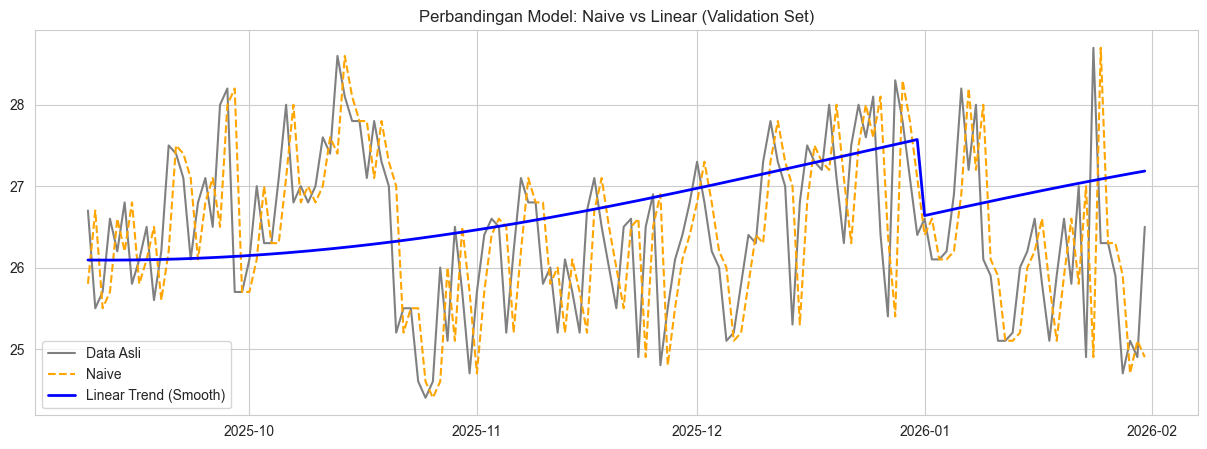

In [123]:
# Visualisasi Perbandingan
plt.figure(figsize=(15, 5))
plt.plot(y_test_final.index, y_test_final, label='Data Asli', color='gray')
plt.plot(y_test_final.index, y_pred_naive_final, label='Naive', linestyle='--', color='orange')
plt.plot(y_test_final.index, y_pred_lr_final, label='Linear Trend (Smooth)', color='blue', linewidth=2)
plt.title('Perbandingan Model: Naive vs Linear (Validation Set)')
plt.legend()
plt.show()

### Final Training Data

In [124]:
# FINAL TRAINING (SEMUA DATA)

# Melatih ulang model menggunakan SELURUH data (Train + Test)
# Supaya model punya informasi terbaru sampai hari ini

x_full = df_forecast[features]
y_full = df_forecast[target]

model_final = LinearRegression()
model_final.fit(x_full, y_full)


print("Model Final Siap Digunakan untuk Forecasting.")

Model Final Siap Digunakan untuk Forecasting.


### Generate Data Masa Depan

In [125]:
# GENERATE MASA DEPAN (20 HARI)

# 1. Buat Tanggal
future_days = 20
last_date = df_forecast.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

df_future = pd.DataFrame(index=future_dates)

# 2. Feature Engineering Masa Depan (Harus Sama Persis Logic-nya)
df_future['Date_Ordinal'] = df_future.index.map(pd.Timestamp.toordinal)
df_future['day_of_year'] = df_future.index.dayofyear # Pake Day of Year lagi

# Sin Cos Transform
df_future['sin_day'] = np.sin(2 * np.pi * df_future['day_of_year'] / 365.25)
df_future['cos_day'] = np.cos(2 * np.pi * df_future['day_of_year'] / 365.25)

# 3. Prediksi
df_future['Prediksi_TAVG'] = model_final.predict(df_future[features])

print("Forecasting Selesai.")
df_future.head()

Forecasting Selesai.


,Date_Ordinal,day_of_year,sin_day,cos_day,Prediksi_TAVG
2026-02-01,739648,32,0.523094,0.852275,27.033647
2026-02-02,739649,33,0.537677,0.843151,27.049702
2026-02-03,739650,34,0.552101,0.833777,27.065590
2026-02-04,739651,35,0.566362,0.824157,27.081309
2026-02-05,739652,36,0.580455,0.814292,27.096853


### Visualisasi Hasil

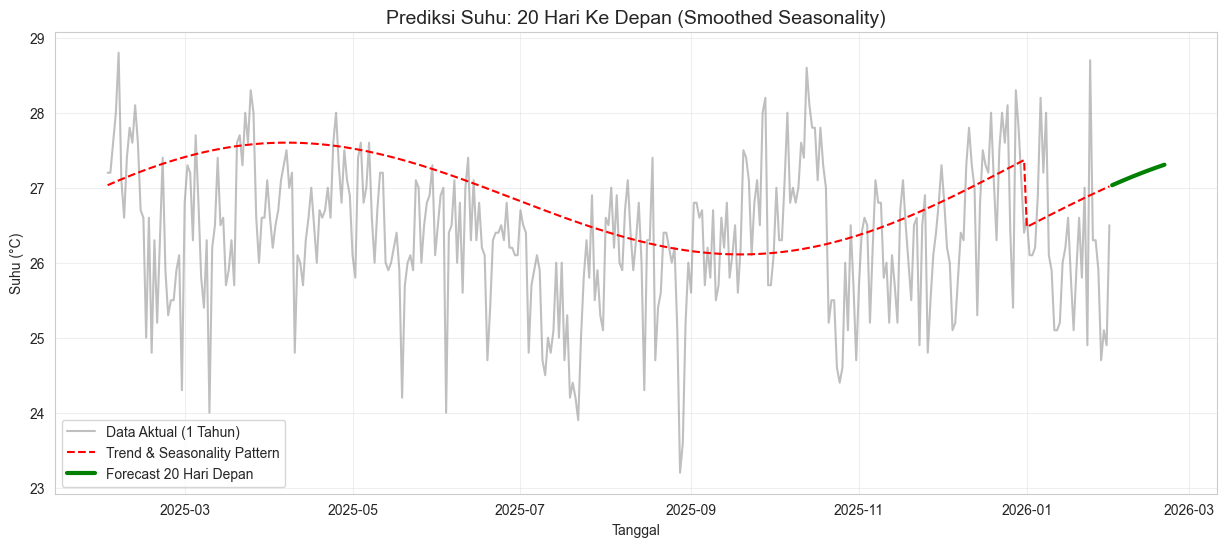

,Prediksi_TAVG
2026-02-01,27.033647
2026-02-02,27.049702
2026-02-03,27.065590
2026-02-04,27.081309
2026-02-05,27.096853
2026-02-06,27.112220
2026-02-07,27.127406
2026-02-08,27.142406
2026-02-09,27.157218
2026-02-10,27.171837


In [126]:
# VISUALISASI HASIL FORECASTING

plt.figure(figsize=(15, 6))

# Plot Data Asli (1 Tahun Terakhir biar jelas)
plt.plot(df_forecast.index[-365:], df_forecast['TAVG'][-365:], 
         label='Data Aktual (1 Tahun)', color='gray', alpha=0.5)

# Plot Pola Model (Evaluasi Historis)
# Ini menunjukkan garis rata-rata musim yang dipelajari model
y_pred_history = model_final.predict(x_full)
plt.plot(df_forecast.index[-365:], y_pred_history[-365:], 
         label='Trend & Seasonality Pattern', color='red', linestyle='--', linewidth=1.5)

# Plot Prediksi Masa Depan
plt.plot(df_future.index, df_future['Prediksi_TAVG'], 
         label=f'Forecast {future_days} Hari Depan', color='green', linewidth=3)

plt.title(f'Prediksi Suhu: {future_days} Hari Ke Depan (Smoothed Seasonality)', fontsize=14)
plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# tampilkan 10 prediksi masa depan
df_future[['Prediksi_TAVG']].head(10)